# **Question 1** 

### **Part A**
The adjacency matrix looks like,

$A = \begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}$

### **Part B**
Given the features of each node X, graph convolution, 

X' = relu(A*X)

$X' = relu\begin{pmatrix}\begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}*\begin{bmatrix}1&-1\\-2&0.5\\1&3\\0&-1\end{bmatrix}\end{pmatrix}$

$X' = relu\begin{pmatrix}\begin{bmatrix}-1&-0.5\\-1&2.5\\-1&3.5\\2&1
\end{bmatrix}\end{pmatrix}$

$X' = \begin{bmatrix}0&0\\0&2.5\\0&3.5\\2&1
\end{bmatrix}$

### **Part C**

$D=\begin{bmatrix}2&0&0&0\\0&3&0&0\\0&0&2&0\\0&0&0&3
\end{bmatrix}$

$D^{-1}=\begin{bmatrix}\frac{1}{2}&0&0&0\\0&\frac{1}{3}&0&0\\0&0&\frac{1}{2}&0\\0&0&0&\frac{1}{3}
\end{bmatrix}$

$A'=D^{-1}A=\begin{bmatrix}\frac{1}{2}&0&0&0\\0&\frac{1}{3}&0&0\\0&0&\frac{1}{2}&0\\0&0&0&\frac{1}{3}
\end{bmatrix}\begin{bmatrix}1&1&0&0\\0&1&1&1\\0&1&1&0\\1&0&1&1
\end{bmatrix}$

$A'=\begin{bmatrix}\frac{1}{2}&\frac{1}{2}&0&0\\0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}\\0&\frac{1}{2}&\frac{1}{2}&0\\\frac{1}{3}&0&\frac{1}{3}&\frac{1}{3}
\end{bmatrix}$

Now, we find relu(A'X)

$relu(A'X)=relu\begin{pmatrix}\begin{bmatrix}\frac{1}{2}&\frac{1}{2}&0&0\\0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}\\0&\frac{1}{2}&\frac{1}{2}&0\\\frac{1}{3}&0&\frac{1}{3}&\frac{1}{3}
\end{bmatrix}*\begin{bmatrix}1&-1\\-2&0.5\\1&3\\0&-1\end{bmatrix}\end{pmatrix}$

$relu(A'X)=relu\begin{pmatrix}\begin{bmatrix}-\frac{1}{2}&-\frac{1}{4}\\-\frac{1}{3}&\frac{5}{6}\\-\frac{1}{2}&\frac{7}{4}\\\frac{2}{3}&\frac{1}{3}
\end{bmatrix}\end{pmatrix}$

$relu(A'X)\begin{bmatrix}0&0\\0&\frac{5}{6}\\0&\frac{7}{4}\\\frac{2}{3}&\frac{1}{3}
\end{bmatrix}$





In [1]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 43.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-nfbdg73q
  Running command git clone --filter=blob:none --quiet https://github.com/p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 48.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import torch
import torch.nn.functional as F
from torch import nn
from torch.nn import Linear
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
import torch_geometric.transforms as T
from torch_geometric.nn import global_max_pool
from torch_geometric.nn import GCNConv, ChebConv

In [3]:
def get_dataset(save_path):
	'''
	read data from .npy file 
	no need to modify this function
	'''
	raw_data = np.load(save_path, allow_pickle=True)
	dataset = []
	for i, (node_f, edge_index, edge_attr, y)in enumerate(raw_data):
		sample = Data(
			x=torch.tensor(node_f, dtype=torch.float),
			y=torch.tensor([y], dtype=torch.float),
			edge_index=torch.tensor(edge_index, dtype=torch.long),
			edge_attr=torch.tensor(edge_attr, dtype=torch.float)
		)
		dataset.append(sample)
	return dataset

In [4]:
from torch._C import Graph
class GraphNet(nn.Module):
  def __init__(self, n_features):
    super(GraphNet,self).__init__()
    self.embed = nn.Linear(n_features, 500)
    self.conv1 = GCNConv(500, 300, normalize=True)
    self.out_layer = nn.Linear(300, 1)

  def forward(self,data):
    x, edge_index = data.x, data.edge_index
    x = self.embed(x.type(torch.FloatTensor))
    x = F.relu(self.conv1(x, edge_index))
    x = F.dropout(x, training=self.training,p=0.01)

    x = global_max_pool(x, data.batch)
    
    return self.out_layer(x)

<ipython-input-3-fc9b8e78a3d3>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  x=torch.tensor(node_f, dtype=torch.float),
/usr/local/lib/python3.8/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


67.47521769074261


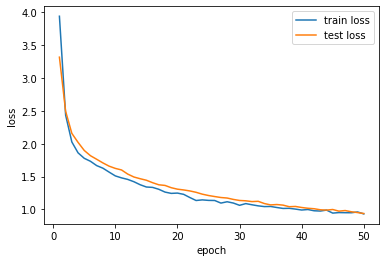

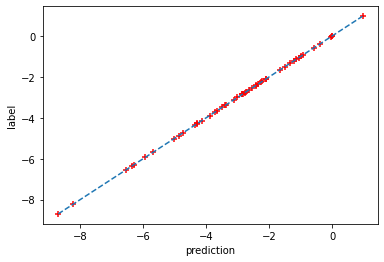

In [5]:
def train(model,train_loader):
  model.train()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
  mse_error = 0.0
  for i, data in enumerate(train_loader):
    optimizer.zero_grad()

    pred = model(data)
    label = data.y[0]

    loss = F.mse_loss(pred.squeeze(), label)
    loss.backward()

    optimizer.step()

    mse_error += loss.item()
  return mse_error / (i+1),label,pred.squeeze()

def test(model,test_loader):
  model.eval()
  mse_error = 0.0
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
  for i, data in enumerate(test_loader):
    optimizer.zero_grad()

    pred = model(data)
    label = data.y[0]

    loss = F.mse_loss(pred.squeeze(), label)
    loss.backward()

    optimizer.step()

    mse_error += loss.item()
  return mse_error / (i+1),label,pred.squeeze()


def main():
  # load data and build the data loader
  train_set = get_dataset('/content/drive/MyDrive/Intro_to_DL/HW_5/train_set.npy')
  test_set = get_dataset('/content/drive/MyDrive/Intro_to_DL/HW_5/test_set.npy')
  train_loader = DataLoader(train_set, batch_size=1, shuffle=True)
  test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

  # number of features in the dataset
  # no need to change the value
  n_features = 37

  # build your GNN model
  model = GraphNet(n_features)
  total_test_loss=0
  # define your loss and optimizer
  hist = {"train_loss":[], "test_loss":[]}
  predictions={"train_loss":[], "test_loss":[]}
  labeled={"train_loss":[], "test_loss":[]}
  num_epoch = 50
  for epoch in range(1, 1+num_epoch):
    train_error = train(model,train_loader)
    test_error = test(model,test_loader)
    hist["train_loss"].append(train_error[0])
    hist["test_loss"].append(test_error[0])
    predictions['train_loss'].append(train_error[1])
    predictions['test_loss'].append(train_error[1])
    labeled['train_loss'].append(train_error[1])
    labeled['test_loss'].append(train_error[1])
    total_test_loss+=test_error[0]
  print(total_test_loss)
	# visualization
	# plot loss function
  ax = plt.subplot(1,1,1)
  ax.plot([e for e in range(1,1+num_epoch)], hist["train_loss"], label="train loss")
  ax.plot([e for e in range(1,1+num_epoch)], hist["test_loss"], label="test loss")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  ax.legend()
  plt.show()

	# # plot prediction vs. label
  x = np.linspace(np.min(predictions['train_loss']), np.max(predictions['train_loss']))
  y = np.linspace(np.min(predictions['train_loss']), np.max(predictions['train_loss']))
  ax = plt.subplot(1,1,1)
  ax.scatter(labeled['test_loss'], predictions['test_loss'], marker='+', c='red')
  ax.plot(x, y, '--')
  plt.xlabel("prediction")
  plt.ylabel("label")
  plt.show()


if __name__ == "__main__":
	main()

From the above plot we can see that the model has a **test mse of 67.45 over 50 epochs**. 